<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap06/6_2_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 6.2 Gradient descent**

This notebook recreates the gradient descent algorithm as shown in figure 6.1.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [56]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [57]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [58]:
# Let's define our model -- just a straight line with intercept phi[0] and slope phi[1]
def model(phi,x):
  y_pred = phi[0]+phi[1] * x
  return y_pred

In [59]:
# Draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

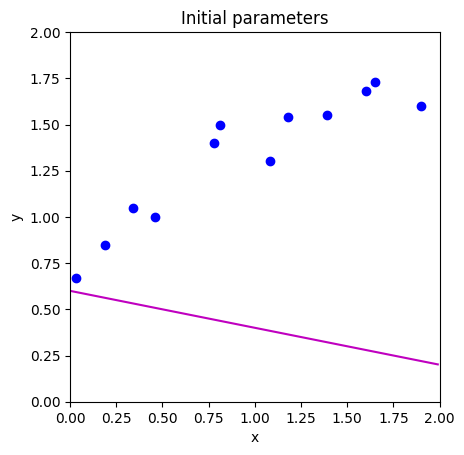

In [60]:
# Initialize the parameters to some arbitrary values and draw the model
phi = np.zeros((2,1))
phi[0] = 0.6      # Intercept
phi[1] = -0.2      # Slope
draw_model(data,model,phi, "Initial parameters")



Now let's compute the sum of squares loss for the training data

In [61]:
def compute_loss(data_x, data_y, model, phi):
  # TODO -- Write this function -- replace the line below
  # First make model predictions from data x
  # Then compute the squared difference between the predictions and true y values
  # Then sum them all and return
 
  pred_y = model(phi,data_x)
  loss = np.sum((pred_y-data_y)**2)

  return loss

Let's just test that we got that right

In [62]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Now let's plot the whole loss function

In [63]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept $\phi_{0}$'); ax.set_ylabel('Slope, $\phi_{1}$')
  plt.show()

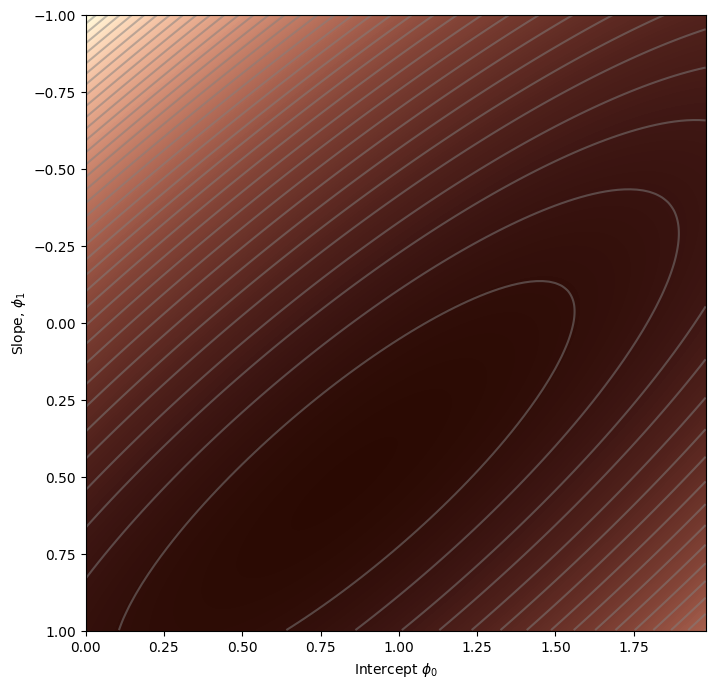

In [64]:
draw_loss_function(compute_loss, data, model)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [65]:
# These are in the lecture slides and notes, but worth trying to calculate them yourself to
# check that you get them right.  Write out the expression for the sum of squares loss and take the
# derivative with respect to phi0 and phi1
def compute_gradient(data_x, data_y, phi):
    # TODO -- write this function, replacing the lines below
    dl_dphi0 = np.sum(2*(phi[0]+phi[1]*data_x-data_y))

    dl_dphi1 = np.sum(2*data_x*(phi[0]+phi[1]*data_x -data_y))
   

    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function two million times, and usually computing the gradients directly is much more efficient.

In [66]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))
# There might be small differences in the last significant figure because finite gradients is an approximation


Your gradients: (-21.904,-26.840)
Approx gradients: (-21.903,-26.839)


C:\Users\Jakub Machura\AppData\Local\Temp\ipykernel_17348\3146724913.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))


Now we are ready to perform gradient descent.  We'll need to use our line search routine from notebook 6.1, which I've reproduced here plus the helper function loss_function_1D that maps the search along the negative gradient direction in 2D space to a 1D problem (distance along this direction)

In [67]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 10, verbose=False):
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1 If point A is less than points B, C, and D then halve points B,C, and D
        # if np.argmin((lossa,lossb,lossc,lossd))==0:
        #   b = b/2
        #   c = c/2
        #   d = d/2
        #   continue;
        if (lossa<lossb and lossa<lossc and lossa<lossd):
          b/=2
          c/=2
          d/=2
        # Rule #2 If point b is less than point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #2 If point c is less than point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Return average of two middle points
    return (b+c)/2.0

In [68]:
def gradient_descent_step(phi, data,  model,gradient):
  # TODO -- update Phi with the gradient descent step (equation 6.3)
  # 1. Compute the gradient (you wrote this function above)
  derivative=compute_gradient(data[0],data[1],phi)
  
  # 2. Find the best step size alpha using line search function (above) -- use negative gradient as going downhill
  alfa=line_search(data,model,phi,-gradient,-1,verbose=True)
  print('alfa %f'%(alfa))
  # 3. Update the parameters phi based on the gradient and the step size alpha.
  print('before slope phi0:%f, phi1: %f'%(phi[0],phi[1]))
  phi=phi-alfa*derivative
  print('after slope phi0:%f, phi1: %f'%(phi[0],phi[1]))

  return phi

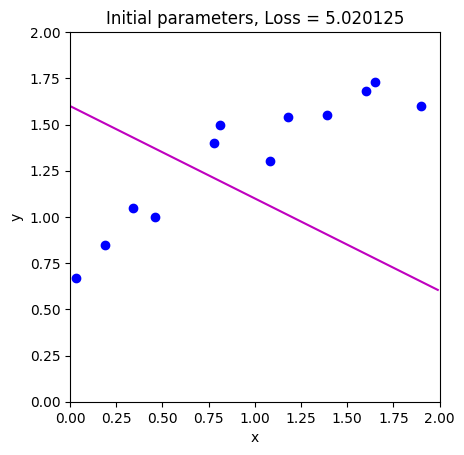

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 5.020125, b22.705014, c105.704753, d259.533329
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 5.020125, b3.657883, c9.552846, d22.705014
Iter 3, a=0.000, b=0.007, c=0.015, d=0.022
a 5.020125, b3.305607, c4.816514, d9.552846
Iter 4, a=0.000, b=0.005, c=0.010, d=0.015
a 5.020125, b3.518733, c3.450862, d4.816514
Iter 5, a=0.005, b=0.008, c=0.011, d=0.015
a 3.518733, b3.314206, c3.746799, d4.816514
Iter 6, a=0.005, b=0.007, c=0.009, d=0.011
a 3.518733, b3.311590, c3.387612, d3.746799
Iter 7, a=0.005, b=0.006, c=0.008, d=0.009
a 3.518733, b3.349175, c3.305468, d3.387612
Iter 8, a=0.006, b=0.007, c=0.008, d=0.009
a 3.349175, b3.306053, c3.318866, d3.387612
Iter 9, a=0.006, b=0.007, c=0.008, d=0.008
a 3.349175, b3.314212, c3.304109, d3.318866
Iter 10, a=0.007, b=0.007, c=0.008, d=0.008
a 3.314212, b3.304715, c3.306266, d3.318866
alfa 0.007410
before slope phi0:1.600000, phi1: -0.500000
after slope phi0:1.635200, phi1: -0.403459


C:\Users\Jakub Machura\AppData\Local\Temp\ipykernel_17348\2027958805.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('before slope phi0:%f, phi1: %f'%(phi[0],phi[1]))
C:\Users\Jakub Machura\AppData\Local\Temp\ipykernel_17348\2027958805.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('after slope phi0:%f, phi1: %f'%(phi[0],phi[1]))


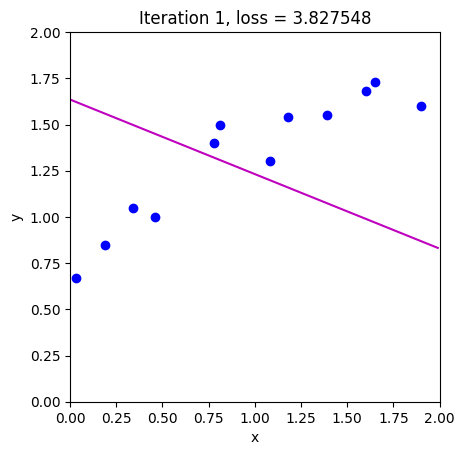

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.827548, b26.994367, c115.476035, d274.952660
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.827548, b4.292616, c12.014888, d26.994367
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.827548, b3.176214, c3.331237, d4.292616
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.827548, b3.303731, c3.138294, d3.331237
Iter 5, a=0.002, b=0.004, c=0.006, d=0.007
a 3.303731, b3.153619, c3.162788, d3.331237
Iter 6, a=0.002, b=0.004, c=0.005, d=0.006
a 3.303731, b3.185959, c3.138978, d3.162788
Iter 7, a=0.004, b=0.004, c=0.005, d=0.006
a 3.185959, b3.146772, c3.139049, d3.162788
Iter 8, a=0.004, b=0.005, c=0.005, d=0.006
a 3.146772, b3.138127, c3.143466, d3.162788
Iter 9, a=0.004, b=0.005, c=0.005, d=0.005
a 3.146772, b3.139455, c3.138353, d3.143466
Iter 10, a=0.005, b=0.005, c=0.005, d=0.005
a 3.139455, b3.138030, c3.139367, d3.143466
alfa 0.004792
before slope phi0:1.635200, phi1: -0.403459
after slope phi0:1.643356, phi1: -0.358773


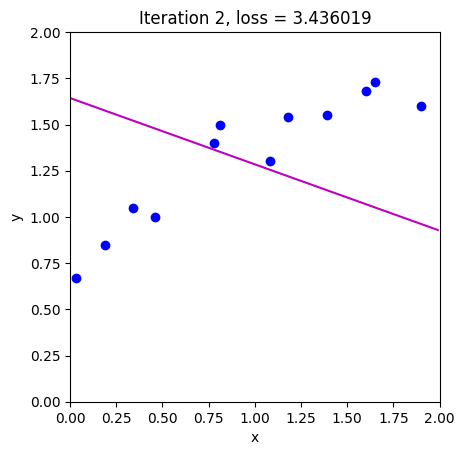

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.436019, b28.834648, c119.548125, d281.324191
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.436019, b4.645023, c13.111233, d28.834648
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.436019, b3.032664, c3.435666, d4.645023
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.436019, b3.077521, c3.077403, d3.435666
Iter 5, a=0.002, b=0.004, c=0.006, d=0.007
a 3.077521, b3.037622, c3.157004, d3.435666
Iter 6, a=0.002, b=0.004, c=0.005, d=0.006
a 3.077521, b3.033224, c3.059718, d3.157004
Iter 7, a=0.002, b=0.003, c=0.004, d=0.005
a 3.077521, b3.040124, c3.034190, d3.059718
Iter 8, a=0.003, b=0.004, c=0.004, d=0.005
a 3.040124, b3.032672, c3.039203, d3.059718
Iter 9, a=0.003, b=0.003, c=0.004, d=0.004
a 3.040124, b3.033602, c3.033295, d3.039203
Iter 10, a=0.003, b=0.004, c=0.004, d=0.004
a 3.033602, b3.032707, c3.034574, d3.039203
alfa 0.003705
before slope phi0:1.643356, phi1: -0.358773
after slope phi0:1.645159, phi1: -0.329879


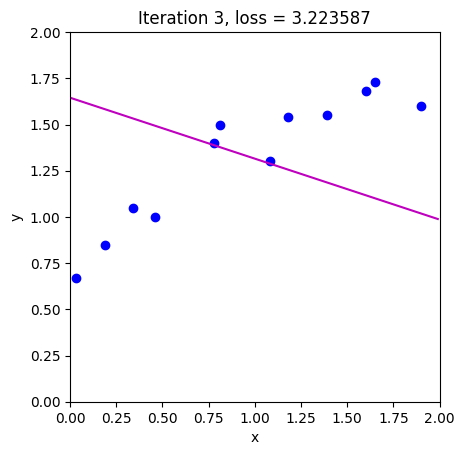

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.223587, b29.934927, c121.961117, d285.089674
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.223587, b4.870162, c13.773942, d29.934927
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.223587, b2.966089, c3.514948, d4.870162
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.223587, b2.962327, c3.059447, d3.514948
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 3.223587, b3.009594, c2.954880, d3.059447
Iter 6, a=0.002, b=0.003, c=0.004, d=0.005
a 3.009594, b2.955420, c2.972038, d3.059447
Iter 7, a=0.002, b=0.002, c=0.003, d=0.004
a 3.009594, b2.965612, c2.953094, d2.972038
Iter 8, a=0.002, b=0.003, c=0.003, d=0.004
a 2.965612, b2.953771, c2.955913, d2.972038
Iter 9, a=0.002, b=0.003, c=0.003, d=0.003
a 2.965612, b2.956164, c2.952931, d2.955913
Iter 10, a=0.003, b=0.003, c=0.003, d=0.003
a 2.956164, b2.953318, c2.953234, d2.955913
alfa 0.003105
before slope phi0:1.645159, phi1: -0.329879
after slope phi0:1.644488, phi1: -0.308487


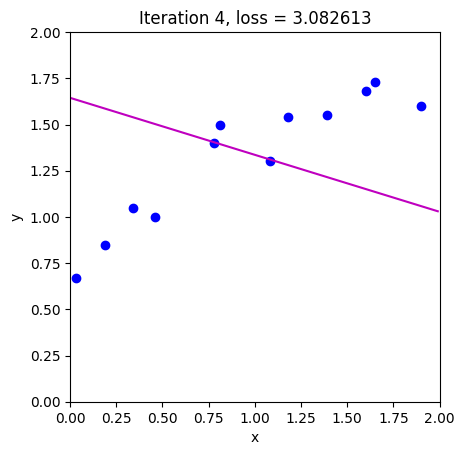

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.082613, b30.690504, c123.613243, d287.665518
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.082613, b5.028038, c14.230668, d30.690504
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.082613, b2.924732, c3.573207, d5.028038
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.082613, b2.887764, c3.051295, d3.573207
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 3.082613, b2.912894, c2.902454, d3.051295
Iter 6, a=0.002, b=0.003, c=0.004, d=0.005
a 2.912894, b2.888236, c2.934370, d3.051295
Iter 7, a=0.002, b=0.002, c=0.003, d=0.004
a 2.912894, b2.888590, c2.895749, d2.934370
Iter 8, a=0.002, b=0.002, c=0.003, d=0.003
a 2.912894, b2.893195, c2.887480, d2.895749
Iter 9, a=0.002, b=0.002, c=0.003, d=0.003
a 2.893195, b2.887831, c2.888683, d2.895749
Iter 10, a=0.002, b=0.002, c=0.003, d=0.003
a 2.893195, b2.888929, c2.887425, d2.888683
alfa 0.002542
before slope phi0:1.644488, phi1: -0.308487
after slope phi0:1.642739, phi1: -0.292570


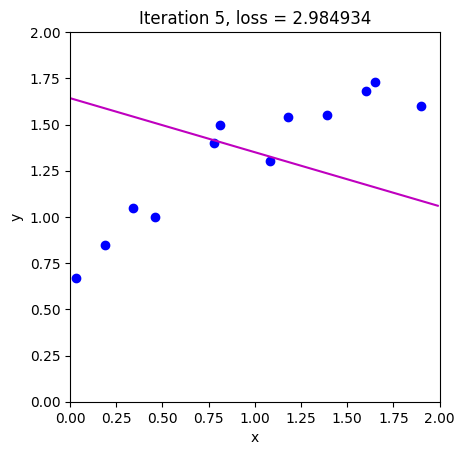

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.984934, b31.212987, c124.755890, d289.447120
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.984934, b5.137080, c14.546431, d31.212987
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.984934, b2.895960, c3.613342, d5.137080
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 2.984934, b2.836023, c3.045492, d3.613342
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 2.984934, b2.845840, c2.866026, d3.045492
Iter 6, a=0.000, b=0.001, c=0.002, d=0.003
a 2.984934, b2.874507, c2.834871, d2.866026
Iter 7, a=0.001, b=0.002, c=0.003, d=0.003
a 2.874507, b2.840217, c2.837390, d2.866026
Iter 8, a=0.002, b=0.002, c=0.003, d=0.003
a 2.840217, b2.834837, c2.843440, d2.866026
Iter 9, a=0.002, b=0.002, c=0.002, d=0.003
a 2.840217, b2.835076, c2.836151, d2.843440
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.840217, b2.836099, c2.834744, d2.836151
alfa 0.002240
before slope phi0:1.642739, phi1: -0.292570
after slope phi0:1.640479, phi1: -0.279524


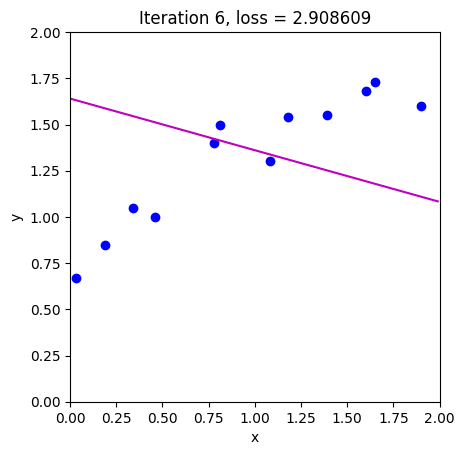

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.908609, b31.613890, c125.634020, d290.816940
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.908609, b5.219830, c14.788257, d31.613890
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.908609, b2.872660, c3.643067, d5.219830
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 2.908609, b2.795048, c3.039867, d3.643067
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 2.908609, b2.793081, c2.836834, d3.039867
Iter 6, a=0.000, b=0.001, c=0.002, d=0.003
a 2.908609, b2.813893, c2.789968, d2.836834
Iter 7, a=0.001, b=0.002, c=0.003, d=0.003
a 2.813893, b2.790077, c2.797724, d2.836834
Iter 8, a=0.001, b=0.002, c=0.002, d=0.003
a 2.813893, b2.794520, c2.789130, d2.797724
Iter 9, a=0.002, b=0.002, c=0.002, d=0.003
a 2.794520, b2.789373, c2.790441, d2.797724
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.794520, b2.790398, c2.789038, d2.790441
alfa 0.001998
before slope phi0:1.640479, phi1: -0.279524
after slope phi0:1.637975, phi1: -0.268563


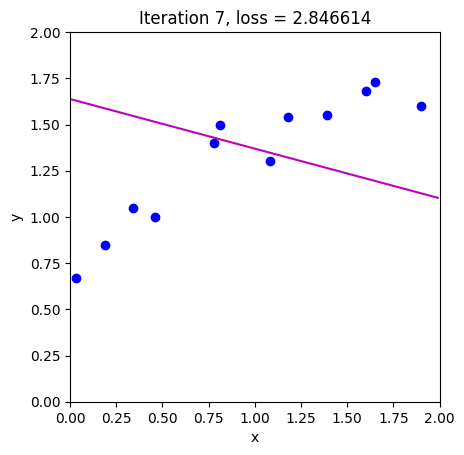

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.846614, b31.930123, c126.328482, d291.901091
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.846614, b5.283912, c14.978415, d31.930123
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.846614, b2.852691, c3.665123, d5.283912
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.846614, b2.759045, c2.761070, d2.852691
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.846614, b2.778279, c2.749765, d2.761070
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.778279, b2.754845, c2.749109, d2.761070
Iter 7, a=0.001, b=0.002, c=0.002, d=0.002
a 2.754845, b2.749054, c2.751129, d2.761070
Iter 8, a=0.001, b=0.002, c=0.002, d=0.002
a 2.754845, b2.750111, c2.748872, d2.751129
Iter 9, a=0.002, b=0.002, c=0.002, d=0.002
a 2.750111, b2.748897, c2.749236, d2.751129
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.750111, b2.749129, c2.748837, d2.749236
alfa 0.001814
before slope phi0:1.637975, phi1: -0.268563
after slope phi0:1.635358, phi1: -0.259108


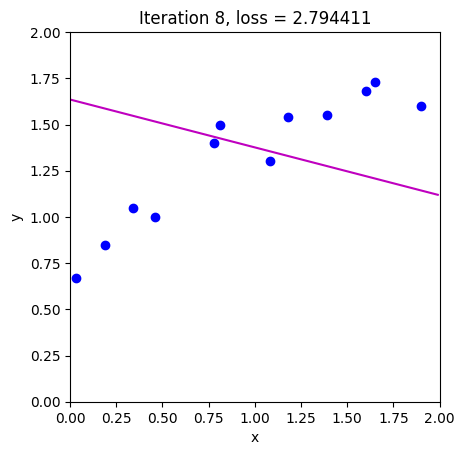

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.794411, b32.187041, c126.894519, d292.785616
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.794411, b5.334749, c15.132292, d32.187041
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.794411, b2.834834, c3.681614, d5.334749
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.794411, b2.718291, c2.731765, d2.834834
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.794411, b2.733709, c2.712827, d2.731765
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.733709, b2.715363, c2.714715, d2.731765
Iter 7, a=0.001, b=0.002, c=0.002, d=0.002
a 2.715363, b2.712965, c2.718432, d2.731765
Iter 8, a=0.001, b=0.002, c=0.002, d=0.002
a 2.715363, b2.712890, c2.713913, d2.718432
Iter 9, a=0.001, b=0.002, c=0.002, d=0.002
a 2.715363, b2.713326, c2.712843, d2.713913
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.713326, b2.712831, c2.713027, d2.713913
alfa 0.001626
before slope phi0:1.635358, phi1: -0.259108
after slope phi0:1.632763, phi1: -0.250995


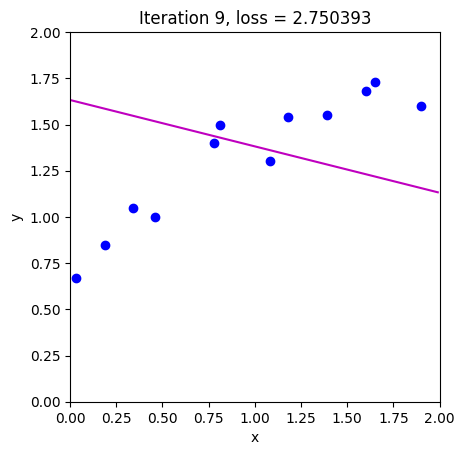

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.750393, b32.395093, c127.354642, d293.505448
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.750393, b5.374754, c15.256320, d32.395093
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.750393, b2.818824, c3.693611, d5.374754
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.750393, b2.683608, c2.706418, d2.818824
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.750393, b2.695914, c2.681256, d2.706418
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.695914, b2.681718, c2.685219, d2.706418
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.695914, b2.684484, c2.680919, d2.685219
Iter 8, a=0.001, b=0.001, c=0.002, d=0.002
a 2.684484, b2.681233, c2.681478, d2.685219
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.684484, b2.681928, c2.680926, d2.681478
Iter 10, a=0.001, b=0.001, c=0.002, d=0.002
a 2.681928, b2.681088, c2.680938, d2.681478
alfa 0.001553
before slope phi0:1.632763, phi1: -0.250995
after slope phi0:1.630095, phi1: -0.243537


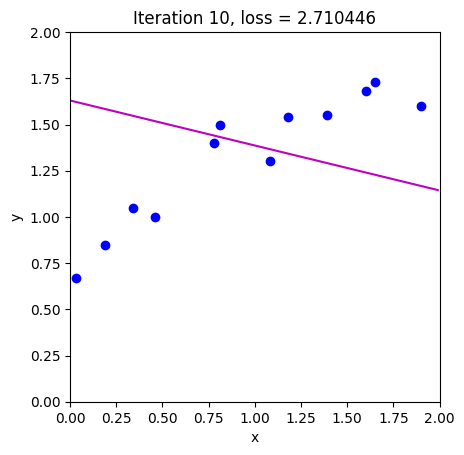

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.710446, b32.576287, c127.756978, d294.135628
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.710446, b5.408521, c15.363801, d32.576287
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.710446, b2.803448, c3.702806, d5.408521
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.710446, b2.651851, c2.682852, d2.803448
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.710446, b2.661428, c2.652230, d2.682852
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.661428, b2.650872, c2.658013, d2.682852
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.661428, b2.652424, c2.651286, d2.658013
Iter 8, a=0.001, b=0.001, c=0.002, d=0.002
a 2.652424, b2.650791, c2.652654, d2.658013
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.652424, b2.650947, c2.651024, d2.652654
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.652424, b2.651267, c2.650800, d2.651024
alfa 0.001392
before slope phi0:1.630095, phi1: -0.243537
after slope phi0:1.627555, phi1: -0.237079


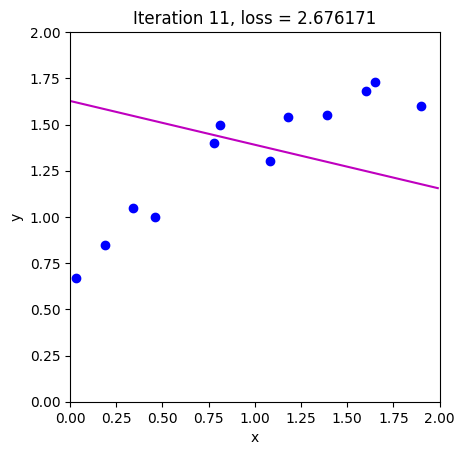

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.676171, b32.724904, c128.088486, d294.655569
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.676171, b5.435210, c15.451454, d32.724904
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.676171, b2.789494, c3.709174, d5.435210
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.676171, b2.624350, c2.662125, d2.789494
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.676171, b2.631669, c2.626987, d2.662125
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.631669, b2.624123, c2.634275, d2.662125
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.631669, b2.624672, c2.625541, d2.634275
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.631669, b2.626130, c2.624087, d2.625541
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.626130, b2.624380, c2.624183, d2.625541
Iter 10, a=0.001, b=0.001, c=0.001, d=0.002
a 2.624380, b2.624076, c2.624463, d2.625541
alfa 0.001324
before slope phi0:1.627555, phi1: -0.237079
after slope phi0:1.625024, phi1: -0.231113


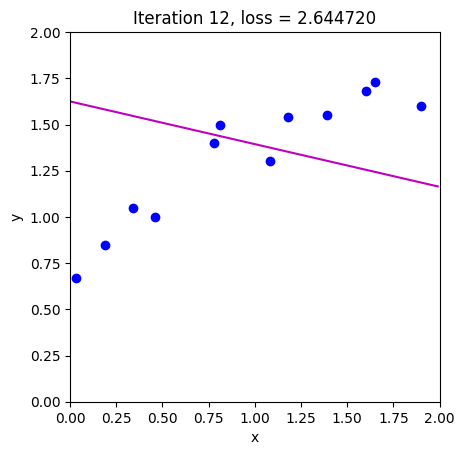

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.644720, b32.855472, c128.381073, d295.115084
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.644720, b5.457765, c15.528016, d32.855472
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.644720, b2.776046, c3.713727, d5.457765
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.644720, b2.598900, c2.642675, d2.776046
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.644720, b2.604219, c2.603537, d2.642675
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.604219, b2.599340, c2.612159, d2.642675
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.604219, b2.599000, c2.601646, d2.612159
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.604219, b2.599865, c2.599008, d2.601646
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.599865, b2.598905, c2.599499, d2.601646
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.599865, b2.599053, c2.598931, d2.599499
alfa 0.001271
before slope phi0:1.625024, phi1: -0.231113
after slope phi0:1.622499, phi1: -0.225542


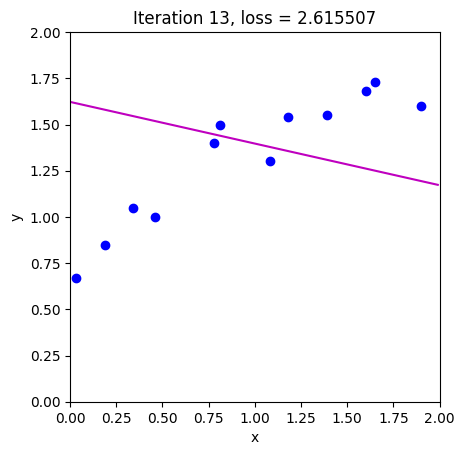

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.615507, b32.971468, c128.642279, d295.525900
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.615507, b5.476955, c15.595609, d32.971468
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.615507, b2.762967, c3.716783, d5.476955
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.615507, b2.575065, c2.624218, d2.762967
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.615507, b2.578590, c2.581494, d2.624218
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.615507, b2.586471, c2.575134, d2.581494
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.586471, b2.576947, c2.575288, d2.581494
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.576947, b2.574967, c2.576483, d2.581494
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.576947, b2.575238, c2.575084, d2.576483
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.575238, b2.574962, c2.575377, d2.576483
alfa 0.001174
before slope phi0:1.622499, phi1: -0.225542
after slope phi0:1.620090, phi1: -0.220526


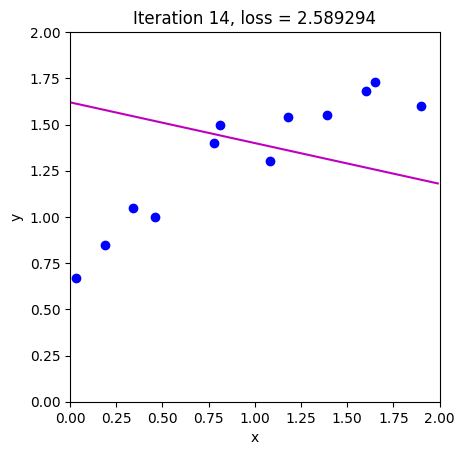

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.589294, b33.070877, c128.867309, d295.880357
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.589294, b5.492616, c15.653144, d33.070877
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.589294, b2.750712, c3.718486, d5.492616
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.589294, b2.553505, c2.607311, d2.750712
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.589294, b2.555480, c2.561485, d2.607311
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.589294, b2.562327, c2.553057, d2.561485
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.562327, b2.554180, c2.553900, d2.561485
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.554180, b2.553119, c2.555554, d2.561485
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.554180, b2.553085, c2.553543, d2.555554
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.554180, b2.553277, c2.553065, d2.553543
alfa 0.001120
before slope phi0:1.620090, phi1: -0.220526
after slope phi0:1.617727, phi1: -0.215847


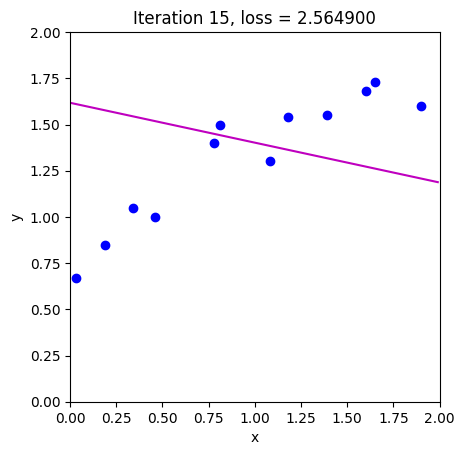

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.564900, b33.159365, c129.068680, d296.198032
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.564900, b5.505850, c15.704005, d33.159365
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.564900, b2.738861, c3.719177, d5.505850
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.564900, b2.533292, c2.591279, d2.738861
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.564900, b2.533873, c2.542666, d2.591279
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.564900, b2.539791, c2.532380, d2.542666
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.539791, b2.532884, c2.533842, d2.542666
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.539791, b2.534312, c2.532329, d2.533842
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.534312, b2.532602, c2.532445, d2.533842
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.532602, b2.532325, c2.532738, d2.533842
alfa 0.001053
before slope phi0:1.617727, phi1: -0.215847
after slope phi0:1.615453, phi1: -0.211539


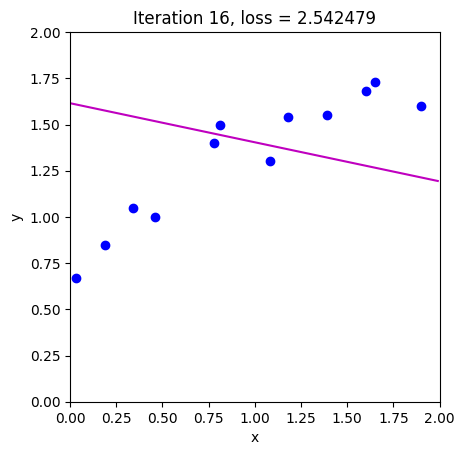

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.542479, b33.237158, c129.246687, d296.479291
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.542479, b5.516833, c15.748393, d33.237158
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.542479, b2.727574, c3.719025, d5.516833
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.542479, b2.514582, c2.576280, d2.727574
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.542479, b2.513926, c2.525193, d2.576280
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.542479, b2.519019, c2.513257, d2.525193
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.519019, b2.513211, c2.515269, d2.525193
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.519019, b2.514273, c2.513023, d2.515269
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.514273, b2.513052, c2.513384, d2.515269
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.514273, b2.513286, c2.512990, d2.513384
alfa 0.000999
before slope phi0:1.615453, phi1: -0.211539
after slope phi0:1.613251, phi1: -0.207527


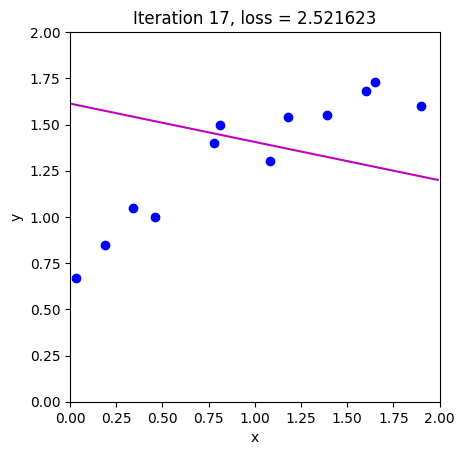

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.521623, b33.306435, c129.406096, d296.731563
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.521623, b5.526021, c15.787625, d33.306435
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.521623, b2.716733, c3.718199, d5.526021
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.521623, b2.497064, c2.562101, d2.716733
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.521623, b2.495296, c2.508788, d2.562101
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.521623, b2.499647, c2.495369, d2.508788
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.499647, b2.494828, c2.497876, d2.508788
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.499647, b2.495561, c2.494970, d2.497876
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.495561, b2.494779, c2.495550, d2.497876
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.495561, b2.494867, c2.494863, d2.495550
alfa 0.000999
before slope phi0:1.613251, phi1: -0.207527
after slope phi0:1.611011, phi1: -0.203586


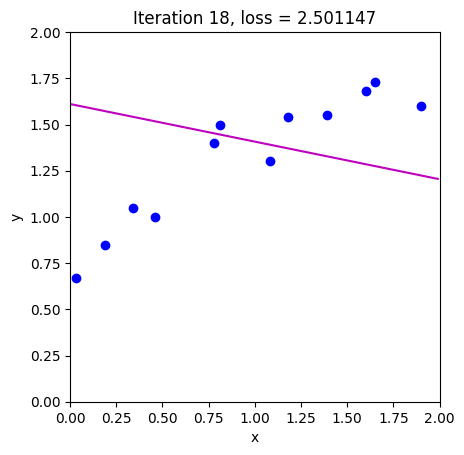

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.501147, b33.371617, c129.556936, d296.970657
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.501147, b5.534098, c15.824255, d33.371617
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.501147, b2.705775, c3.716759, d5.534098
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.501147, b2.479761, c2.547971, d2.705775
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.501147, b2.476935, c2.492543, d2.547971
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.501147, b2.480581, c2.477713, d2.492543
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.480581, b2.476703, c2.480690, d2.492543
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.480581, b2.477122, c2.477158, d2.480690
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.480581, b2.477886, c2.476745, d2.477158
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.477886, b2.476953, c2.476710, d2.477158
alfa 0.000919
before slope phi0:1.611011, phi1: -0.203586
after slope phi0:1.608917, phi1: -0.200024


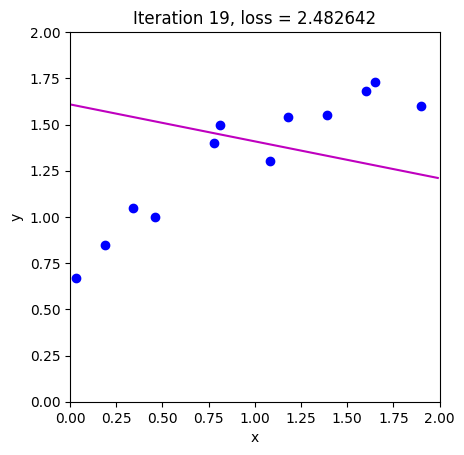

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.482642, b33.427963, c129.688133, d297.178973
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.482642, b5.540543, c15.855650, d33.427963
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.482642, b2.695586, c3.714887, d5.540543
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.482642, b2.464028, c2.535010, d2.695586
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.482642, b2.460278, c2.477734, d2.535010
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.482642, b2.463308, c2.461672, d2.477734
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.463308, b2.460251, c2.465059, d2.477734
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.463308, b2.460396, c2.460980, d2.465059
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.463308, b2.460978, c2.460202, d2.460980
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.460978, b2.460288, c2.460289, d2.460980
alfa 0.000811
before slope phi0:1.608917, phi1: -0.200024
after slope phi0:1.607043, phi1: -0.196926


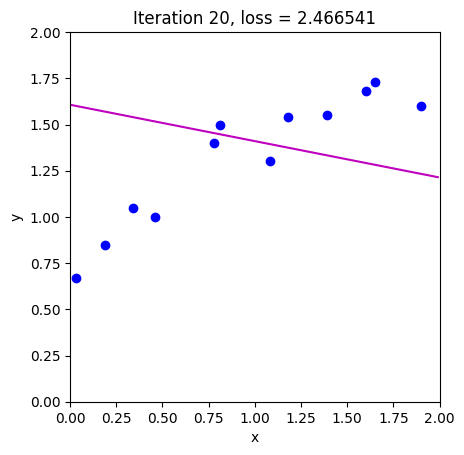

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.466541, b33.474956, c129.798221, d297.354067
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.466541, b5.545474, c15.881612, d33.474956
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.466541, b2.686495, c3.712806, d5.545474
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.466541, b2.450264, c2.523582, d2.686495
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.466541, b2.445734, c2.464748, d2.523582
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.466541, b2.448245, c2.447648, d2.464748
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.448245, b2.445881, c2.451382, d2.464748
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.448245, b2.445795, c2.446840, d2.451382
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.448245, b2.446223, c2.445755, d2.446840
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.446223, b2.445738, c2.445944, d2.446840
alfa 0.000811
before slope phi0:1.607043, phi1: -0.196926
after slope phi0:1.605148, phi1: -0.193869


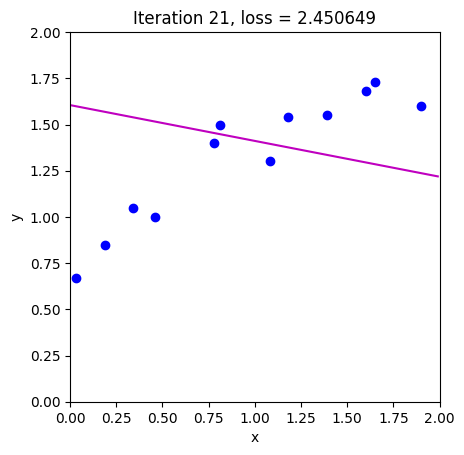

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.450649, b33.519619, c129.903437, d297.521672
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.450649, b5.549767, c15.906090, d33.519619
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.450649, b2.677332, c3.710372, d5.549767
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.450649, b2.436615, c2.512176, d2.677332
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.450649, b2.431338, c2.451847, d2.512176
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.450649, b2.433351, c2.433750, d2.451847
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.450649, b2.437151, c2.431518, d2.433750
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.437151, b2.432521, c2.431388, d2.433750
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.432521, b2.431377, c2.431787, d2.433750
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.432521, b2.431586, c2.431341, d2.431787
alfa 0.000818
before slope phi0:1.605148, phi1: -0.193869
after slope phi0:1.603218, phi1: -0.190827


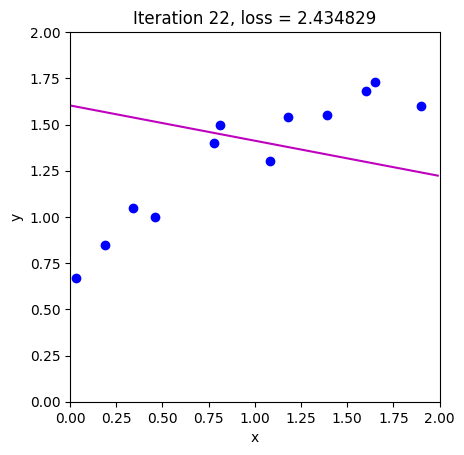

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.434829, b33.562394, c130.004809, d297.683416
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.434829, b5.553479, c15.929334, d33.562394
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.434829, b2.668023, c3.707573, d5.553479
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.434829, b2.422965, c2.500696, d2.668023
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.434829, b2.416965, c2.438920, d2.500696
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.434829, b2.418495, c2.419859, d2.438920
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.434829, b2.421973, c2.416983, d2.419859
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.421973, b2.417773, c2.417068, d2.419859
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.417773, b2.416914, c2.417610, d2.419859
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.417773, b2.417028, c2.416973, d2.417610
alfa 0.000818
before slope phi0:1.603218, phi1: -0.190827
after slope phi0:1.601268, phi1: -0.187823


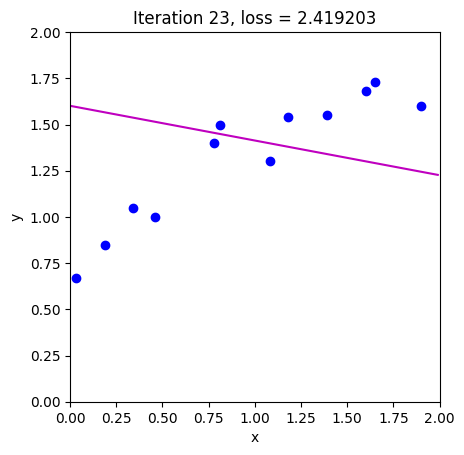

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.419203, b33.602987, c130.101621, d297.838150
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.419203, b5.556592, c15.951187, d33.602987
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.419203, b2.658643, c3.704439, d5.556592
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.419203, b2.409421, c2.489234, d2.658643
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.419203, b2.402726, c2.426070, d2.489234
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.419203, b2.403794, c2.406083, d2.426070
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.419203, b2.406964, c2.402591, d2.406083
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.406964, b2.403174, c2.402881, d2.406083
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.403174, b2.402590, c2.403560, d2.406083
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.403174, b2.402612, c2.402741, d2.403560
alfa 0.000711
before slope phi0:1.601268, phi1: -0.187823
after slope phi0:1.599559, phi1: -0.185245


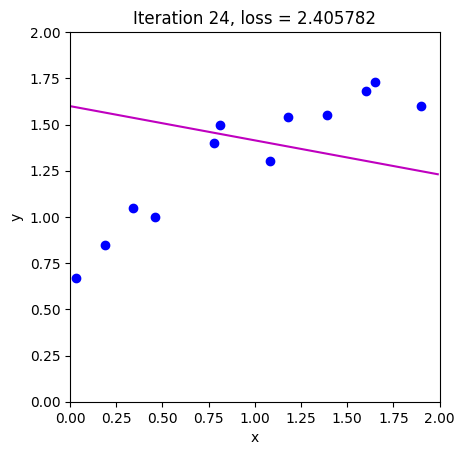

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.405782, b33.636431, c130.181929, d297.966744
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.405782, b5.558793, c15.969009, d33.636431
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.405782, b2.650429, c3.701433, d5.558793
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.405782, b2.397736, c2.479285, d2.650429
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.405782, b2.390463, c2.414964, d2.479285
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.405782, b2.391145, c2.394205, d2.414964
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.405782, b2.394057, c2.390198, d2.394205
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.394057, b2.390611, c2.390660, d2.394205
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.394057, b2.391371, c2.390239, d2.390660
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.391371, b2.390444, c2.390206, d2.390660
alfa 0.000738
before slope phi0:1.599559, phi1: -0.185245
after slope phi0:1.597773, phi1: -0.182599


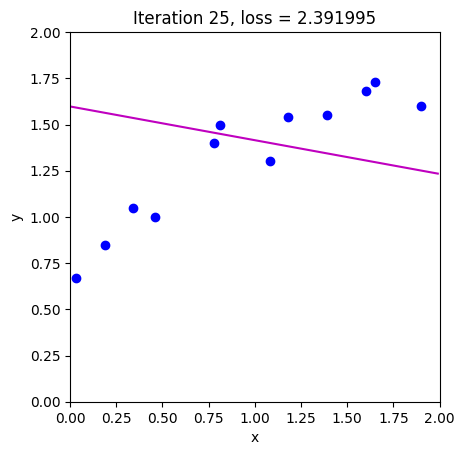

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.391995, b33.669564, c130.261982, d298.095138
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.391995, b5.560646, c15.986502, d33.669564
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.391995, b2.641856, c3.698073, d5.560646
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.391995, b2.385687, c2.468974, d2.641856
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.391995, b2.377835, c2.403494, d2.468974
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.391995, b2.378130, c2.381963, d2.403494
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.391995, b2.380786, c2.377442, d2.381963
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.380786, b2.377682, c2.378075, d2.381963
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.380786, b2.378328, c2.377425, d2.378075
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.378328, b2.377553, c2.377469, d2.378075
alfa 0.000738
before slope phi0:1.597773, phi1: -0.182599
after slope phi0:1.595973, phi1: -0.179981


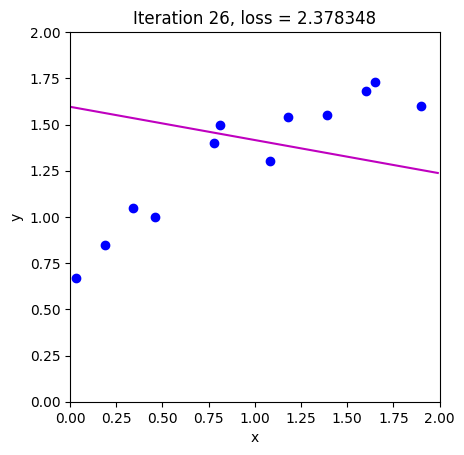

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.378348, b33.701122, c130.338746, d298.218477
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.378348, b5.562067, c16.002992, d33.701122
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.378348, b2.633232, c3.694472, d5.562067
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.378348, b2.373714, c2.458676, d2.633232
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.378348, b2.365304, c2.392080, d2.458676
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.378348, b2.365228, c2.369805, d2.392080
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.378348, b2.367635, c2.364787, d2.369805
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.367635, b2.364862, c2.365586, d2.369805
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.367635, b2.365398, c2.364715, d2.365586
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.365398, b2.364770, c2.364832, d2.365586
alfa 0.000630
before slope phi0:1.595973, phi1: -0.179981
after slope phi0:1.594424, phi1: -0.177767


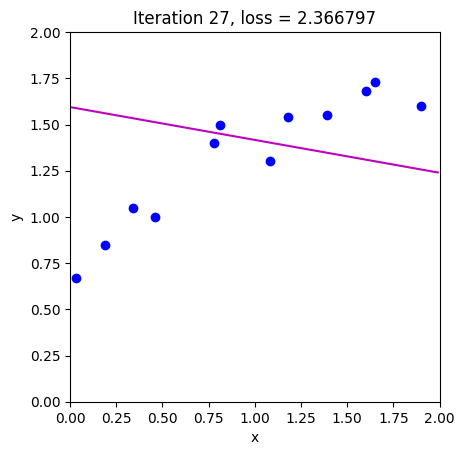

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.366797, b33.726790, c130.401632, d298.319709
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.366797, b5.562923, c16.016253, d33.726790
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.366797, b2.625816, c3.691191, d5.562923
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.366797, b2.363542, c2.449881, d2.625816
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.366797, b2.354672, c2.382367, d2.449881
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.366797, b2.354289, c2.359479, d2.382367
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.366797, b2.356492, c2.354053, d2.359479
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.356492, b2.353992, c2.354987, d2.359479
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.356492, b2.354437, c2.353935, d2.354987
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.354437, b2.353930, c2.354113, d2.354987
alfa 0.000630
before slope phi0:1.594424, phi1: -0.177767
after slope phi0:1.592868, phi1: -0.175573


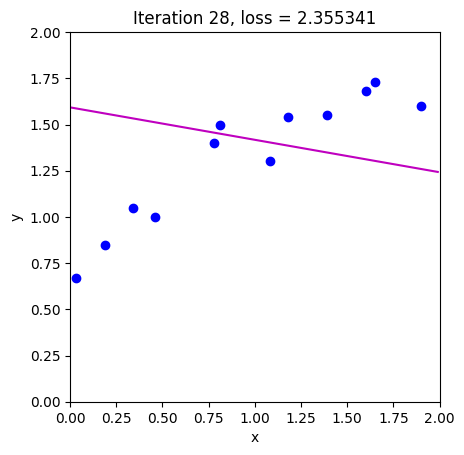

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.355341, b33.751391, c130.462290, d298.417516
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.355341, b5.563485, c16.028835, d33.751391
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.355341, b2.618366, c3.687748, d5.563485
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.355341, b2.353421, c2.441096, d2.618366
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.355341, b2.344106, c2.372691, d2.441096
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.355341, b2.343427, c2.349210, d2.372691
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.355341, b2.345432, c2.343388, d2.349210
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.345432, b2.343195, c2.344455, d2.349210
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.345432, b2.343552, c2.343227, d2.344455
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.343552, b2.343163, c2.343463, d2.344455
alfa 0.000630
before slope phi0:1.592868, phi1: -0.175573
after slope phi0:1.591303, phi1: -0.173399


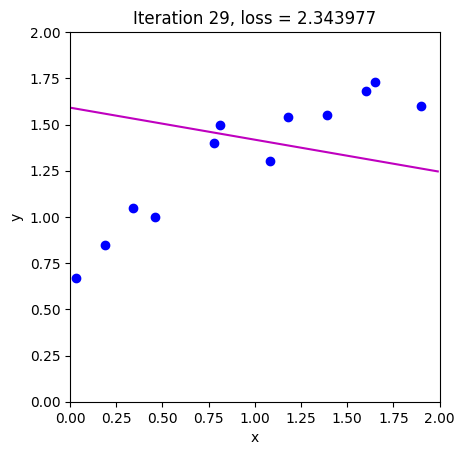

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.343977, b33.774959, c130.520790, d298.512007
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.343977, b5.563766, c16.040759, d33.774959
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.343977, b2.610884, c3.684147, d5.563766
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.343977, b2.343351, c2.432320, d2.610884
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.343977, b2.333605, c2.363052, d2.432320
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.343977, b2.332638, c2.338996, d2.363052
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.343977, b2.334451, c2.332791, d2.338996
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.334451, b2.332470, c2.333985, d2.338996
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.334451, b2.332742, c2.332587, d2.333985
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.332742, b2.332466, c2.332880, d2.333985
alfa 0.000630
before slope phi0:1.591303, phi1: -0.173399
after slope phi0:1.589731, phi1: -0.171243


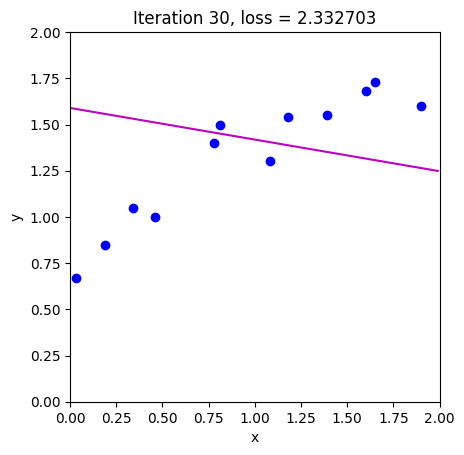

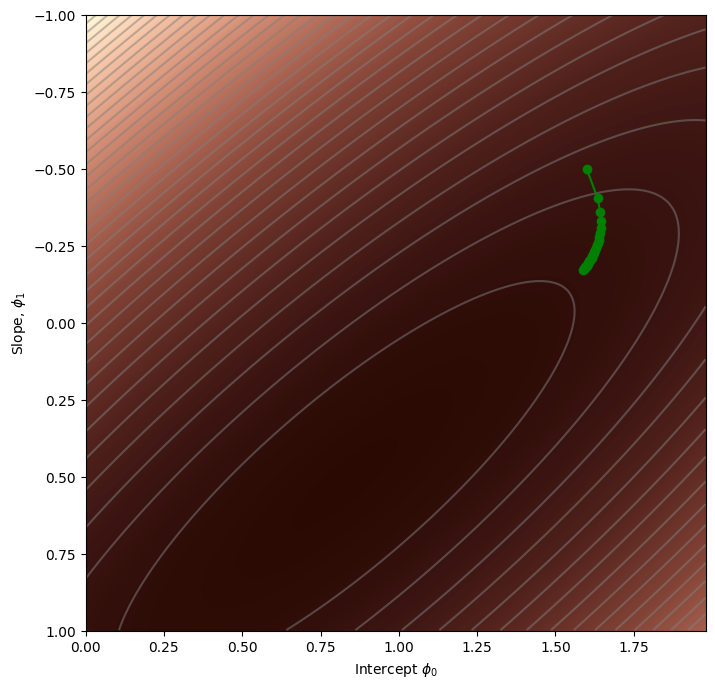

In [70]:
# Initialize the parameters and draw the model
n_steps = 30
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

# Repeatedly take gradient descent steps
for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model,gradient)
  # print(phi_all[:,c_step+1:c_step+2])
  # Measure loss and draw model
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model,phi_all)
